In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.stats.diagnostic import acorr_ljungbox

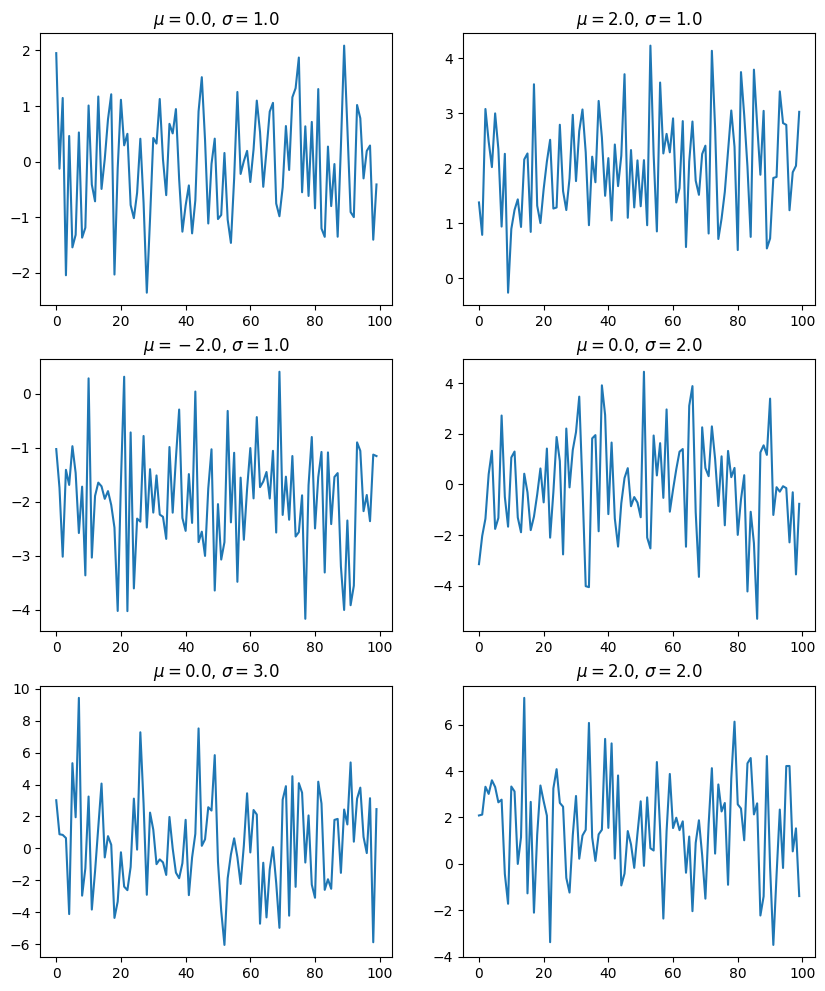

In [2]:
n_data = 100
ts = np.arange(n_data)
mus = [0.0, 2.0, -2.0, 0.0, 0.0, 2.0]
sigmas = [1.0, 1.0, 1.0, 2.0, 3.0, 2.0]
plt.figure(figsize=[10, 12])
for i in range(6):
    yt = mus[i] + sigmas[i] * np.random.randn(n_data)
    plt.subplot(3, 2, i+1)
    plt.title(rf'$\mu={mus[i]}$, $\sigma={sigmas[i]}$')
    plt.plot(ts, yt)

In [3]:
df = pd.read_excel('data/economicdata.xls').rename(columns={'Unnamed: 0': 'date'}).set_index('date'); df

,nikkei225,topix,indprod,exrate,cpi,saunemp,intrate
date,,,,,,,
1975-01-01,3767.09,276.09,47.33,29.13,52.625,1.7,12.67
1975-02-01,4100.97,299.81,46.86,29.70,52.723,1.8,13.00
1975-03-01,4300.08,313.50,46.24,29.98,53.114,1.8,12.92
1975-04-01,4435.26,320.57,47.33,29.80,54.092,1.8,12.02
1975-05-01,4506.24,329.65,47.33,29.79,54.385,1.8,11.06
...,...,...,...,...,...,...,...
2004-12-01,11061.32,1110.39,99.91,87.46,98.109,4.5,0.00
2005-01-01,11394.84,1144.09,103.41,88.88,97.913,4.5,0.00
2005-02-01,11545.30,1159.71,101.41,87.72,97.620,4.6,0.00


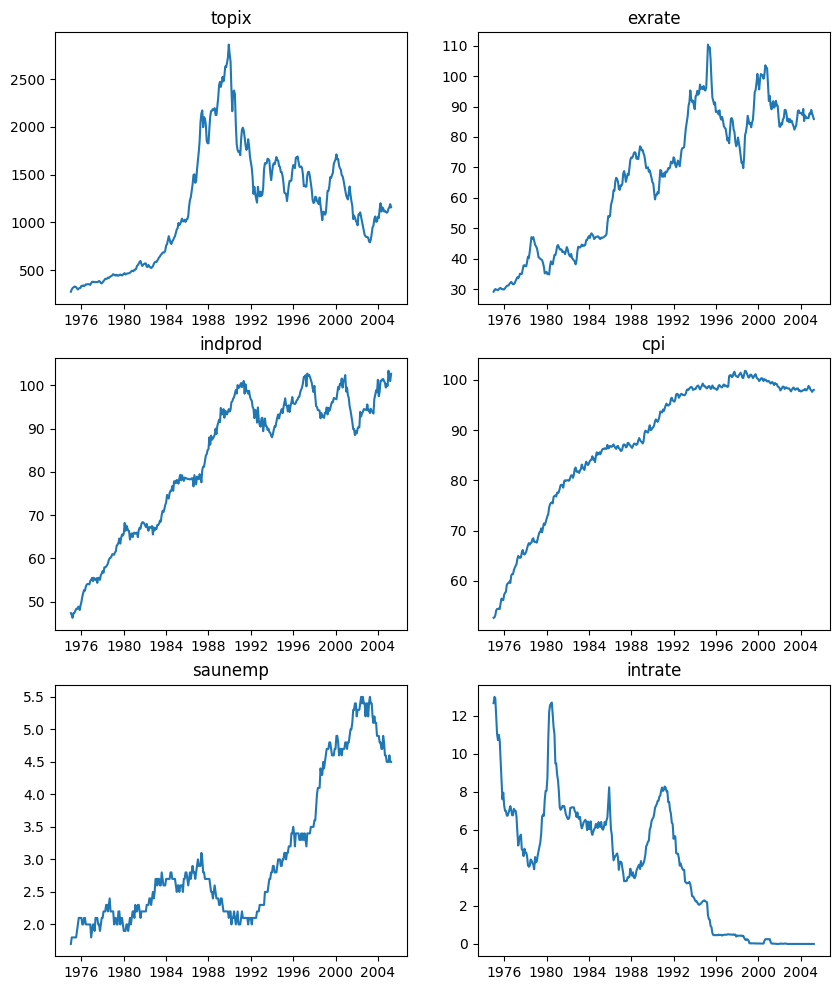

In [4]:
columns = ['topix', 'exrate', 'indprod', 'cpi', 'saunemp', 'intrate']
plt.figure(figsize=[10, 12])
counter = 0
for col in columns:
    counter += 1
    plt.subplot(3, 2, counter)
    plt.title(col)
    plt.plot(df[col])

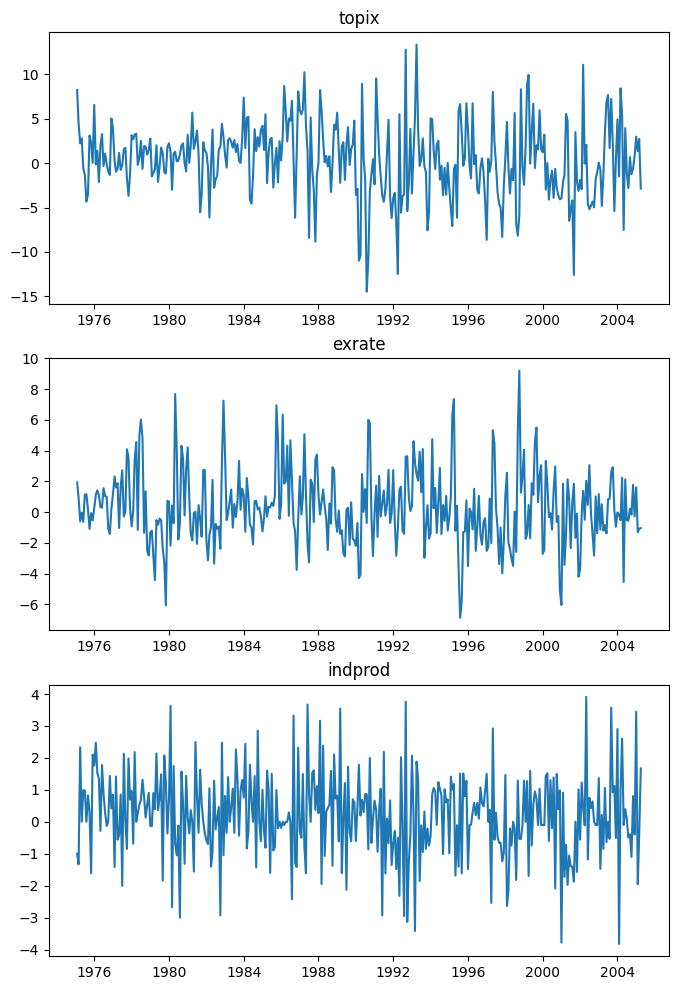

In [5]:
plt.figure(figsize=[8, 12])
counter = 0
for col in ['topix', 'exrate', 'indprod']:
    counter += 1
    plt.subplot(3, 1, counter)
    plt.title(col)
    plt.plot(df[col].apply(np.log).diff() * 100)

Text(0, 0.5, 'auto corr')

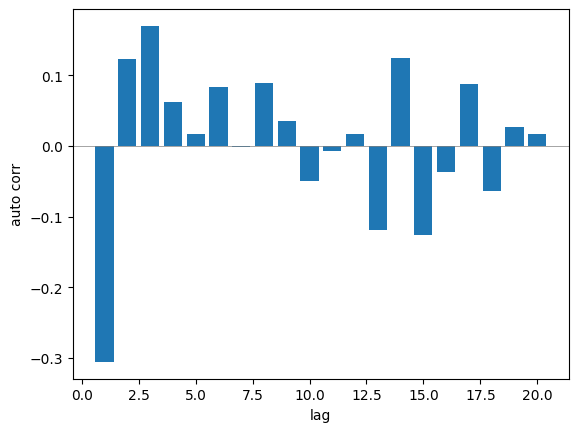

In [6]:
n_lag = 20
plt.bar(np.arange(1, n_lag+1), acf(df.indprod.apply(np.log).diff(), missing='drop', nlags=n_lag)[1:])
plt.axhline(0.0, color='gray', lw=0.5)
plt.xlabel('lag')
plt.ylabel('auto corr')

In [7]:
pd.options.display.float_format = '{:.2f}'.format
print('indprod')
acorr_ljungbox(df['indprod'].apply(np.log).replace([np.inf, -np.inf], np.nan).diff().dropna(), lags=10).transpose()

indprod


,1,2,3,4,5,6,7,8,9,10
lb_stat,34.20,39.76,50.40,51.80,51.91,54.46,54.46,57.46,57.94,58.84
lb_pvalue,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [8]:
pd.options.display.float_format = '{:.2f}'.format
for col in ['topix', 'exrate', 'cpi', 'saunemp']:
    df_tmp = acorr_ljungbox(df[col].apply(np.log).replace([np.inf, -np.inf], np.nan).diff().dropna(), lags=10).transpose()
    print(col)
    display(df_tmp)

topix


,1,2,3,4,5,6,7,8,9,10
lb_stat,34.68,36.39,36.84,38.55,38.91,39.87,39.97,40.20,44.42,45.97
lb_pvalue,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


exrate


,1,2,3,4,5,6,7,8,9,10
lb_stat,37.90,38.76,41.79,42.29,42.73,45.26,45.61,49.88,53.74,53.87
lb_pvalue,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


cpi


,1,2,3,4,5,6,7,8,9,10
lb_stat,8.72,17.94,17.98,21.45,41.28,63.63,78.35,81.69,81.71,88.47
lb_pvalue,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


saunemp


,1,2,3,4,5,6,7,8,9,10
lb_stat,7.36,30.54,36.14,43.33,47.33,47.77,50.62,50.74,51.01,57.42
lb_pvalue,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
